# Analyse du cas R-S et graphiques 2D

L'objectif de cet exemple est de présenter le cas R-S. Nous présentons également des éléments graphiques pour la visualisation de la surface d'état limite en 2 dimensions.

In [1]:
import openturns as ot
import numpy as np
import otbenchmark

In [2]:
R = ot.Normal(4., 1.)
R.setDescription("R")

S = ot.Normal(2., 1.)
S.setDescription("S")

In [3]:
g = ot.SymbolicFunction(["R","S"],["R-S"])

In [4]:
inputvector = ot.ComposedDistribution([R,S])
inputRV = ot.RandomVector(inputvector)
outputRV = ot.CompositeRandomVector(g, inputRV)
eventF = ot.Event(outputRV, ot.GreaterOrEqual(), 0) 

## Dessiner les isovaleurs de la fonction d'état limite

In [5]:
alphaMin = 0.01
alphaMax = 1 - alphaMin
lowerBound = ot.Point([R.computeQuantile(alphaMin)[0], S.computeQuantile(alphaMin)[0]])
upperBound = ot.Point([R.computeQuantile(alphaMax)[0], S.computeQuantile(alphaMax)[0]])

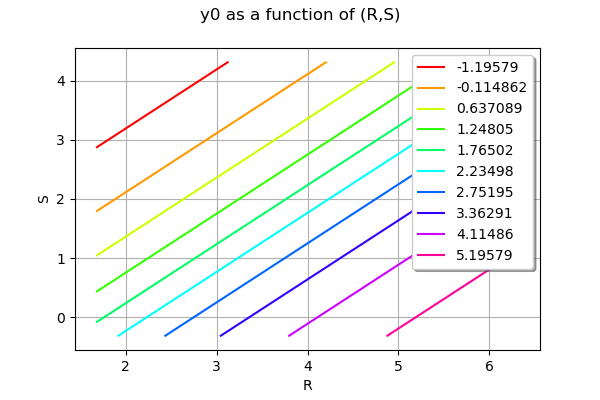

In [6]:
nbPoints = [100, 100]
g.draw(lowerBound, upperBound, nbPoints)

## Visualiser les zones fiables et défaillantes

In [7]:
sampleSize = 500

In [8]:
sampleInput = inputvector.getSample(sampleSize)
sampleInput[:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=2 description=[R,S] data=[[4.6082,2.18972],[2.73383,0.440103],[3.56173,2.14171],[5.20548,1.68712],[1.81861,0.903308]]

In [9]:
sampleOutput = g(sampleInput)

In [10]:
drawEvent = otbenchmark.DrawEvent(eventF)

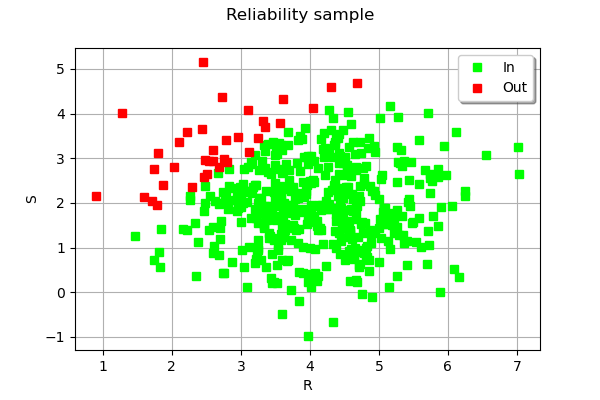

In [11]:
drawEvent.drawSample(sampleInput, sampleOutput)

## Dessiner la surface d'état limite

In [12]:
bounds = ot.Interval(lowerBound, upperBound)
bounds

class=Interval name=Unnamed dimension=2 lower bound=class=Point name=Unnamed dimension=2 values=[1.67365,-0.326348] upper bound=class=Point name=Unnamed dimension=2 values=[6.32635,4.32635] finite lower bound=[1,1] finite upper bound=[1,1]

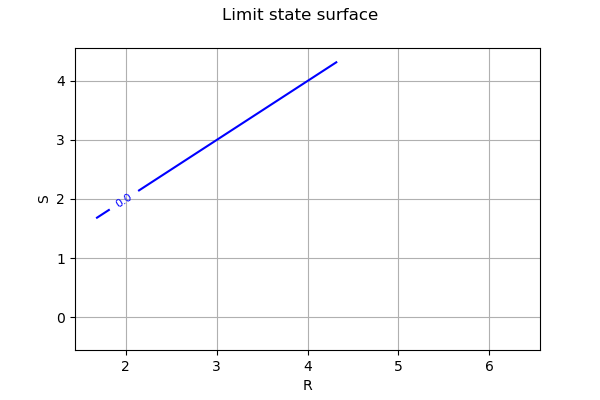

In [13]:
nX = 75
nY = 75
drawEvent.drawLimitState(bounds, nX, nY)

## Fill the event domain with a color

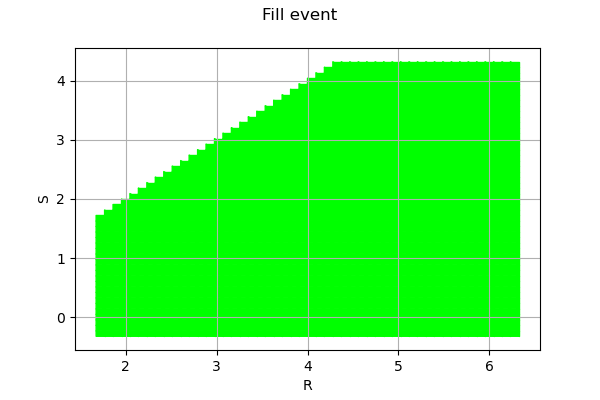

In [14]:
drawEvent.fillEvent(bounds)